In [1]:
# !pip install gpustat

In [3]:
import warnings
warnings.filterwarnings('ignore')

from fastai.vision import *

from sklearn.model_selection import KFold

In [4]:
torch.cuda.set_device(0)
fold = 0

In [5]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [6]:
val_idx = np.load(f'fold{fold}_val.npy')
val_idx, len(val_idx)

(array([   2,    4,    7,   15, ..., 5842, 5849, 5853, 5854]), 1172)

In [7]:
stats = ([0.48746821, 0.48746821, 0.48746821],[0.24557937, 0.24557937, 0.24557937])

data = (ImageList.from_folder(data_path)
      .split_by_idx(val_idx)
      .label_from_folder()
      .transform(get_transforms(), size=256)
      .databunch(num_workers=4)
      .normalize(stats)
     )

In [8]:
print(data.classes, len(data.train_ds), len(data.valid_ds))

['NORMAL', 'PNEUMONIA'] 4684 1172


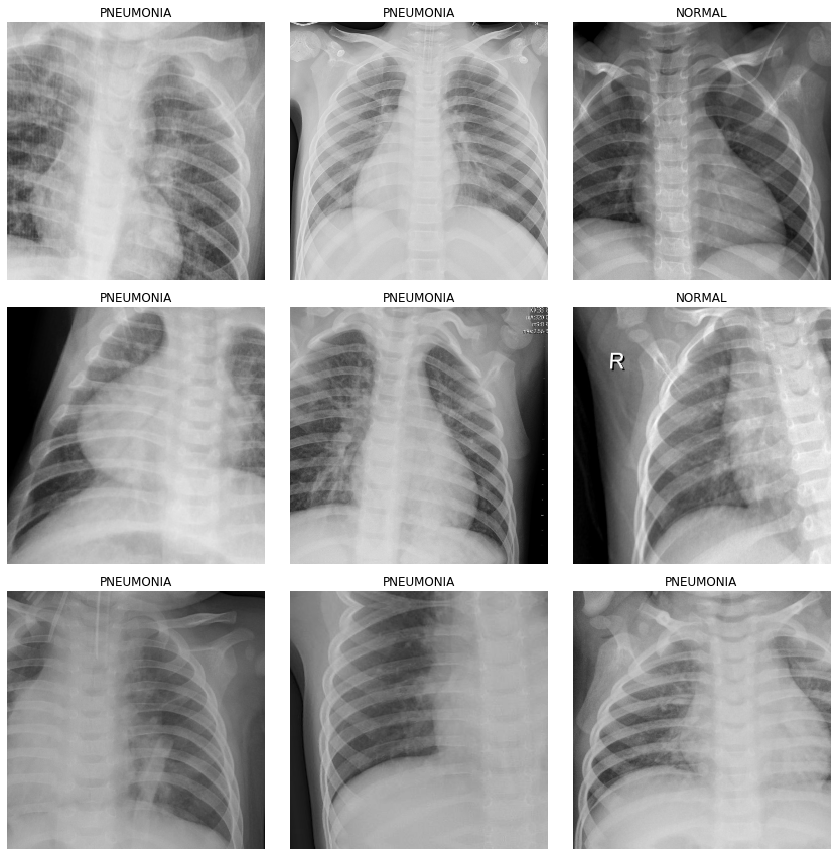

In [9]:
data.show_batch(rows=3)

In [10]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=error_rate, 
                    model_dir=model_path)

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.473961,0.370772,0.082765,01:51
1,0.303504,0.219514,0.064846,01:40


KeyboardInterrupt: 

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


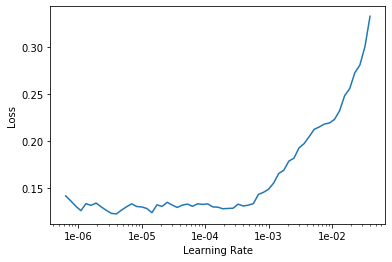

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, max_lr=3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.163459,0.370208,0.084543,00:47
1,0.160785,0.134173,0.040991,00:47
2,0.119924,0.223211,0.060632,00:49
3,0.084490,0.072097,0.023911,00:47
4,0.070555,0.063893,0.019641,00:47


In [25]:
learn.export(model_path / f'fold{fold}.pkl')
learn.save(model_path / f'fold{fold}')